# Step 1: Import all the necessary libraries

In [1]:
import time
import threading
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Create a sample matrix for multiplication

*We are creating one constant matrix which is an identity matrix. Rest all the 100 matrices will be randomly generated when multiplying*

In [2]:
matrix1 = np.eye(1000)

# Step 3: Define the task function

*Our task is to multiply a random matrix with our constant identity matrix.*
*We are creating a task function which does the exact same.*

In [3]:
def task(matrix1):
    matrix2 = np.random.rand(1000, 1000)
    result = np.dot(matrix1, matrix2)
    return

# Step 4: Create a function to start the required number of threads

*Since we are comparing the different results obtained after using different number of threads, we need to create a function that will start the required number of threads and return the time taken accordingly.*

*We will also wait for all the threads to finish before moving on to the next task.*

In [4]:
def thread_task(num_of_threads):
    startTime = time.time()
    activeThreads = threading.active_count()
    
    print("Program Started for", num_of_threads, "threads")
    
    # Multiplying 100 matrices
    for i in range(100):
        t=threading.Thread(target=task, args=(matrix1,))
        t.start()
        while True:
            if threading.active_count() - activeThreads + 1 <= num_of_threads:
                break
            time.sleep(1)
    
    # Wait for all the threads to finish
    while True:
        if threading.active_count() == activeThreads:
            break
        else:
            print("Active Threads: ", threading.active_count())
            print("Threads left:", threading.active_count() - activeThreads)
            time.sleep(1)
            

    print("Program Finished for", num_of_threads, "threads")
    print("Time taken: ", time.time()-startTime)
    return time.time()-startTime

# Step 5: Storing the results obtained

*here, we are creating a dataframe that will store the time taken corresponding to the different thread counts. We are then calling the function for different number of threads and storing the result iteratively.*

In [5]:
result = pd.DataFrame(columns=['Threads', 'Time (Sec)'])

In [6]:
for threads in range(1,11):
    new_row = pd.DataFrame({'Threads': [int(threads)], 'Time (Sec)': [thread_task(threads)]})
    result = pd.concat([result, new_row], ignore_index=True)
    print("\n")

Program Started for 1 threads
Program Finished for 1 threads
Time taken:  100.72315526008606


Program Started for 2 threads
Program Finished for 2 threads
Time taken:  50.359437704086304


Program Started for 3 threads
Active Threads:  7
Threads left: 1
Program Finished for 3 threads
Time taken:  34.29389429092407


Program Started for 4 threads
Program Finished for 4 threads
Time taken:  25.201338291168213


Program Started for 5 threads
Program Finished for 5 threads
Time taken:  20.169706344604492


Program Started for 6 threads
Active Threads:  10
Threads left: 4
Program Finished for 6 threads
Time taken:  17.12649130821228


Program Started for 7 threads
Active Threads:  8
Threads left: 2
Program Finished for 7 threads
Time taken:  15.155792474746704


Program Started for 8 threads
Active Threads:  10
Threads left: 4
Program Finished for 8 threads
Time taken:  13.125009059906006


Program Started for 9 threads
Active Threads:  7
Threads left: 1
Program Finished for 9 threads
Time

In [7]:
result

,Threads,Time (Sec)
0,1,100.723155
1,2,50.359438
2,3,34.293894
3,4,25.201338
4,5,20.169706
5,6,17.126491
6,7,15.155792
7,8,13.125009
8,9,12.158491
9,10,10.138252


# Step 6: Analyzing the result

*We will create a graph that will show the performance in terms of time taken with respect to the number of threads that were used.*

In [10]:
result.T

,0,1,2,3,4,5,6,7,8,9
Threads,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
Time (Sec),100.723155,50.359438,34.293894,25.201338,20.169706,17.126491,15.155792,13.125009,12.158491,10.138252


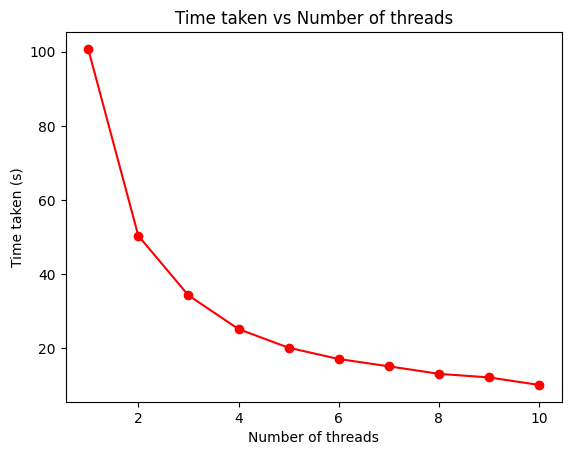

In [11]:
# plot a graph of time taken vs number of threads
plt.plot(result['Threads'], result['Time (Sec)'], marker='o', color='r', label='Time taken vs Number of threads')
plt.xlabel('Number of threads')
plt.ylabel('Time taken (s)')
plt.title('Time taken vs Number of threads')
plt.show()